<a href="https://colab.research.google.com/github/nortem/LogunovNesterova_hs/blob/main/n/hw/Homework_1_Modeling_spiking_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modeling neural activity
In this homework you will study the Adaptive Exponential Integrate and Fire (AdEx) model of neural activity.

## Task
Figure 6.1 in [1] shows multiple patterns of neural activity. The task is the following:
* choose any three of the spiking patterns
* for each pattern build an AdEx model and adjust its parameters such that the model will produce the given pattern
* visualize the dynamics of $u$ and $w$ both at the time plot and at the phase planes

## References

[1] "Adaptive Exponential Integrate-and-Fire" in W. Gerstner et.al. Neuronal Dynamics: 
https://neuronaldynamics.epfl.ch/online/Ch6.S1.html

[2] Naud, R., Marcille, N., Clopath, C., & Gerstner, W. (2008). Firing patterns in the adaptive exponential integrate-and-fire model. Biological cybernetics, 99(4), 335-347

In [1]:
!pip install brian2
!pip install --upgrade numpy
!pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 8.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 4.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import brian2 as b2

# AdEx model
The AdEx neural model usually contains one equation for the membrane potential $u(t)$ and one of more equations for adaption currents $w_k(t)$.
$$
\tau_m\frac{du}{dt} = -(u-u_{rest})+ \Delta_T\exp(\frac{u-\theta_{rh}}{\Delta_T}) -Rw + RI(t) \\
\tau_w \frac{dw}{dt} = a(u-u_{rest})-w+b\tau_w\sum_{t^{(f)}}\delta(t-t^{(f)}) \\
\text{Spike: } t^f: u(t)\ge\theta \\
u:=u_{reset}
$$
The first equation describes the dynamics of the membrane potential $u$ where $u_{rest}$ - rest potential, $\Delta_T$ - sharpness of the exponential rise, $\theta_{rh}$ - rheobase potential, $\theta$ - spike initiating threshold, $u_{reset}$ - afterspike reset potential.

The second equation describes the dynamics of the adaptation current $w$. Parameters $a$ and $b$ controls links the current to the membrane potential and to the spikes. 

Various combinations of the model parameters will provide various spiking patterns.

In [3]:
def plot_v_spikes(v_mon, s_mon, t_bounds=None, labels=None):
    for i in range(len(v_mon.v)):
        if labels:
            plt.plot(v_mon.t/b2.ms, v_mon.v[i]/b2.mV, label=labels[i])
        else:
            plt.plot(v_mon.t/b2.ms, v_mon.v[i]/b2.mV) #, label=f'N{i}')
    for t in s_mon.t:
        plt.axvline(t/b2.ms, ls='--', c='k', lw=1)
    if t_bounds:
        plt.xlim(t_bounds)
    plt.xlabel('Time (ms)')
    plt.ylabel('Membrane voltage (mV)')
    plt.legend(loc='lower left')

def phase_var_grad(v_mon):
    dv_dt = np.gradient(v_mon.v[0]/b2.mV, v_mon.t/b2.ms)*b2.mV/b2.ms
    return v_mon.v[0], dv_dt

def plot_phaseplane(v_mon, outlier_thres=200*b2.mV/b2.ms):
    v, dv_dt = phase_var_grad(v_mon)
    non_outlier = np.abs(dv_dt) < outlier_thres
    plt.plot(v[non_outlier]/b2.mV, dv_dt[non_outlier]/b2.mV*b2.ms, '.')
    plt.xlabel('v (mV)')
    plt.ylabel('dv/dt (mV/ms)')

## Example: simple Exponential Integrate and Fire model
You should modify the code: add the adaptaion current $w$ and plot its dynamics.
Hint: one such model is provided in the notebook for lection 3.

In [15]:
b2.start_scope()

tau = 20*b2.ms 
v_rest = -65 * b2.mvolt
v0 = -65 * b2.mvolt
v_th = -35 * b2.mvolt
v_reset = -80 * b2.mvolt
R = 10 * b2.Mohm
I = 4 * b2.namp
v_rh = -40*b2.mvolt
DT = 2*b2.mvolt
T_run = 100 * b2.ms
a = 4*b2.nS
b = 0.80*b2.nA

In [150]:
b2.start_scope()

tau = 9.9*b2.ms 
tau_w = 100*b2.ms 
a = -0.5*b2.nS
b = 7*b2.pA
v_rest = -46 * b2.mvolt

gL = 1
v0 = -65 * b2.mvolt
v_th = -35 * b2.mvolt
v_reset = -80 * b2.mvolt
R = 10 * b2.Mohm
I = 4 * b2.namp
v_rh = -40*b2.mvolt
DT = 2*b2.mvolt
T_run = 20 * b2.ms

In [155]:
b2.start_scope()

tau = 9.9*b2.ms 
tau_w = 100*b2.ms 
a = -0.5*b2.nS
b = 7*b2.pA
v_rest = -46 * b2.mvolt

gL = 1
v0 = -65 * b2.mvolt
v_th = -35 * b2.mvolt
v_reset = -46 * b2.mvolt
R = 10 * b2.Mohm
I = 4 * b2.namp
v_rh = -40*b2.mvolt
DT = 2*b2.mvolt
T_run = 100 * b2.ms

|Type|Fig.|τm (ms)|a (nS)|τw (ms)|b (pA)|ur (mV)|
| ---- | ---- | ---- | ---- | ---- | ---- | ---- |
|Tonic|6.3A|20|0.0|30.0|60|-55|
|Adapting|6.3B|20|0.0|100|5.0|-55|
|Init. burst|6.4A|5.0|0.5|100|7.0|-51|
|Bursting|6.4C|5.0|-0.5|100|7.0|-46|
|Irregular|6.5A|9.9|-0.5|100|7.0|-46|
|Transient|6.9A|10|1.0|100|10|-60|
|Delayed| |5.0|-1.0|100|10|-60|


In [148]:
b2.start_scope()

tau = 9.9*b2.ms 
tau_w = 100*b2.ms 
a = -0.5*b2.nS
b = 7*b2.pA
v_rest = -46 * b2.mvolt

gL = 1 #30*10**(-9)
v0 = -65 * b2.mvolt
v_th = -30 * b2.mvolt
v_reset = -51 * b2.mvolt
R = 0.5 * b2.Gohm #10 * b2.Mohm
I = 1.5 * b2.nA
v_rh = -51*b2.mvolt
DT = 2*b2.mvolt
T_run = 30 * b2.ms

In [143]:
I_arr = [0]*1 + [1.5]*100 + [0]*10
I = b2.TimedArray(I_arr * b2.nA, dt=5 * b2.ms)

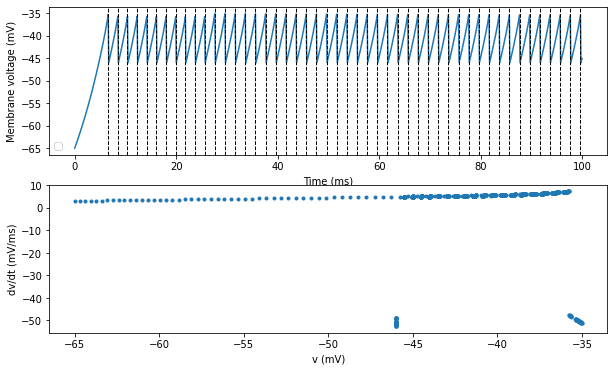

In [156]:
eqs_ex = '''
dv/dt = - gL*(v_rest-v)/tau + gL*DT*exp((v-v_rh)/DT)/tau - R*w/tau + R*I/tau : volt
dw/dt = a*(v_rest-v)/tau_w - w/tau_w : amp
I : amp
'''

# eqs_ex = '''
# dv/dt = - gL*(v_rest-v)/tau + gL*DT*exp((v-v_rh)/DT)/tau - R*w/tau + R*I(t)/tau : volt
# dw/dt = a*(v_rest-v)/tau_w - w/tau_w : amp
# '''
G = b2.NeuronGroup(1, eqs_ex,
                   threshold = 'v > v_th', 
                   reset = 'v = v_reset; w += b', 
                   method = 'euler')
G.v = v0
G.w = 0*b2.nA
G.I = 5 * b2.namp



v_mon = b2.StateMonitor(G, 'v', record = True)
w_mon = b2.StateMonitor(G, 'w', record = True)
spikemon = b2.SpikeMonitor(G)

b2.run(T_run)

plt.figure(figsize=(10,6))
plt.subplot(211)
plot_v_spikes(v_mon, spikemon)
plt.subplot(212)
plot_phaseplane(v_mon)




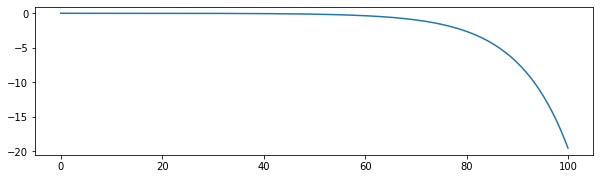

In [126]:
plt.figure(figsize=(10,6))
plt.subplot(212)
plt.plot(w_mon.t/b2.ms, w_mon.w[0]/b2.nA)

# v2
[Текст ссылки](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2798047/)

In [ ]:
b2.start_scope()
C = 2*b2.nF 
gL = 10*b2.nS 
EL = -58*b2.mV
VT = -50*b2.mV
DeltaT = 2*b2.mV 
tauw = 120*b2.ms 
a = 2*b2.nS
v0 = -46*b2.mV
b = 100*b2.pA

In [107]:
b2.start_scope()
C = 2*b2.nF 
gL = 12*b2.nS 
EL = -70*b2.mV
VT = -50*b2.mV
DeltaT = 2*b2.mV 
tauw = 120*b2.ms 
a = 2*b2.nS
v0 = -46*b2.mV
b = 10*b2.pA

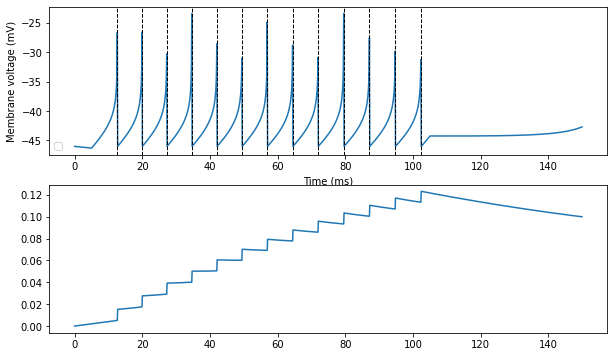

In [108]:
I_arr = [0]*1 + [1.5]*20 + [0]*10
I = b2.TimedArray(I_arr * b2.nA, dt=5 * b2.ms)
# eqs = '''dv/dt = (gL*(EL-v)+gL*DeltaT*exp((v-VT)/DeltaT) -w + I)/C : volt
#          dw/dt=(a*(v-EL)-w)/tauw : amp
#          I : amp'''
eqs = '''dv/dt = (gL*(EL-v)+gL*DeltaT*exp((v-VT)/DeltaT) -w + I(t))/C : volt
         dw/dt=(a*(v-EL)-w)/tauw : amp
         '''
G = b2.NeuronGroup(1, eqs,
                    threshold='v > -20*mV',
                    reset='v=-46*mV; w += b')
v_mon = b2.StateMonitor(G, 'v', record = True)
w_mon = b2.StateMonitor(G, 'w', record = True)
spikemon = b2.SpikeMonitor(G)
G.v = v0
G.w = 0*b2.nA
# G.I = 5 * b2.namp
T = 150*b2.ms
b2.run(T)
plt.figure(figsize=(10,6))
plt.subplot(211)
plot_v_spikes(v_mon, spikemon)
plt.subplot(212)
plt.plot(w_mon.t/b2.ms, w_mon.w[0]/b2.nA)